In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
data = pd.read_csv("/content/drive/MyDrive/dataset/AIES_HW_1/Dataset_I.csv")

In [3]:
data.head()


,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
data.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


Number of fish species is  7
Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64


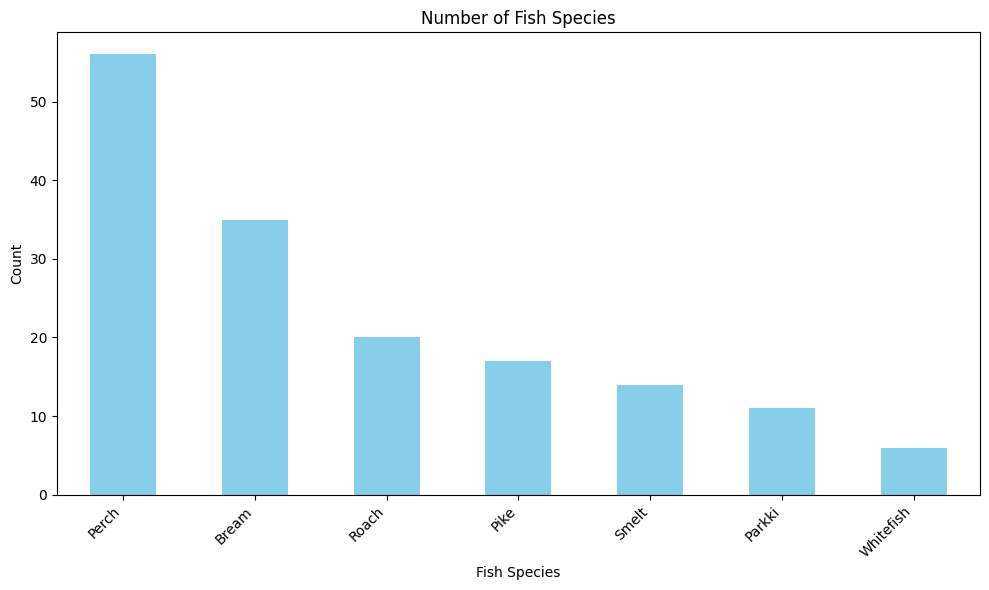

In [5]:
fish_counts = data['Species'].value_counts()
print('Number of fish species is ', len(fish_counts))
print(fish_counts)

plt.figure(figsize=(10, 6))
fish_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Fish Species')
plt.xlabel('Fish Species')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

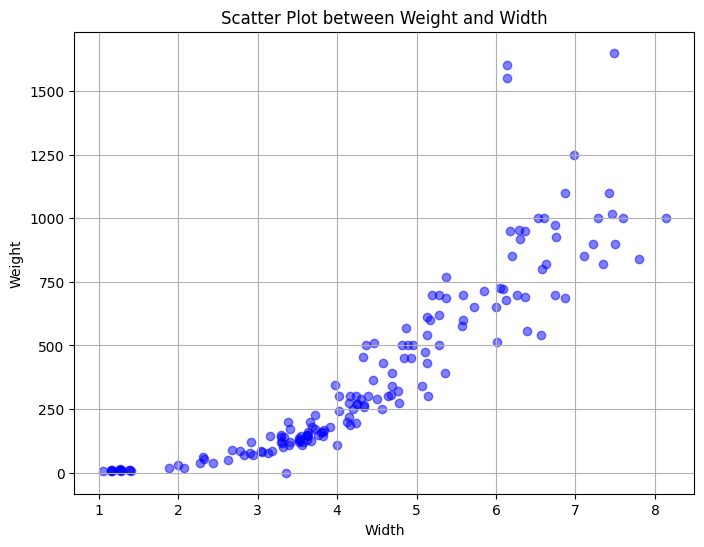

In [6]:
plt.figure(figsize=(8, 6))
plt.scatter(data['Width'], data['Weight'], color='blue', alpha=0.5)
plt.title('Scatter Plot between Weight and Width')
plt.xlabel('Width')
plt.ylabel('Weight')
plt.grid(True)
plt.show()

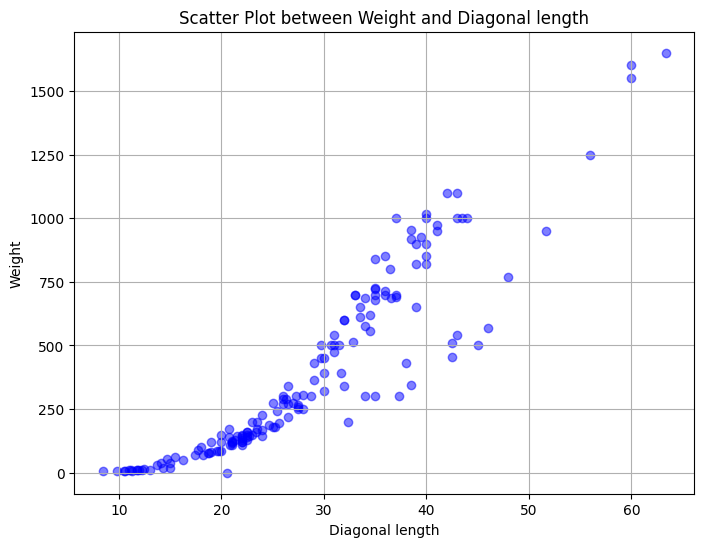

In [7]:
plt.figure(figsize=(8, 6))
plt.scatter(data['Length2'], data['Weight'], color='blue', alpha=0.5)
plt.title('Scatter Plot between Weight and Diagonal length')
plt.xlabel('Diagonal length')
plt.ylabel('Weight')
plt.grid(True)
plt.show()

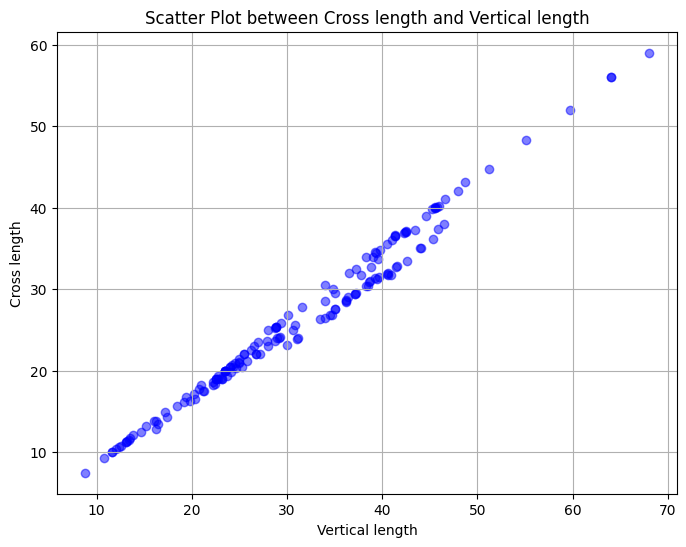

In [8]:
plt.figure(figsize=(8, 6))
plt.scatter(data['Length3'], data['Length1'], color='blue', alpha=0.5)
plt.title('Scatter Plot between Cross length and Vertical length')
plt.xlabel('Vertical length')
plt.ylabel('Cross length')
plt.grid(True)
plt.show()

<class 'numpy.ndarray'>
0.7949880512543228 [[0.86129312]] [-0.58357831]
Mean Squared Error (MSE): 1.764953302608218
Mean Absolute Error (MAE): 1.0999059571976124


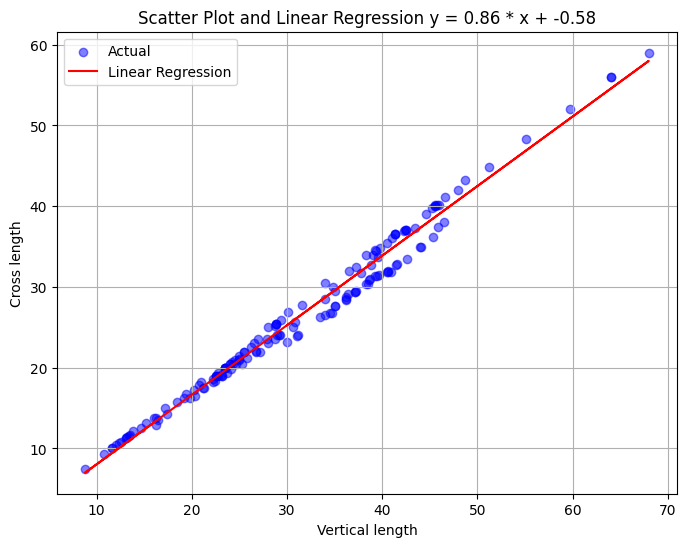

In [9]:
# Splitting the dataset into training and testing sets
x_total = np.reshape(np.array(data['Length3']),(-1,1))
y_total = np.reshape(np.array(data['Length1']),(-1,1))
X_train, X_test, y_train, y_test = train_test_split(x_total, y_total, test_size=0.3, random_state=42)

# X_train = np.reshape(X_train,(-1,1))
# y_train = np.reshape(y_train,(-1,1))
# X_test = np.reshape(X_test,(-1,1))
# y_test = np.reshape(y_test,(-1,1))
print(type(X_train))
# Creating a linear regression model
model = LinearRegression()

# Fitting the model to the training data
model.fit(X_train, y_train)
score = model.score(X_train, X_train)
coef = model.coef_
intercept = model.intercept_
print(score,coef,intercept)

y_total_pred = model.predict(x_total)

# Predicting on the test data
y_pred = model.predict(X_test)
# Calculating Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
# Calculating Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

# Plotting
plt.figure(figsize=(8, 6))

# Scatter plot
plt.scatter(x_total,  y_total, color='blue', alpha=0.5, label='Actual')

# Linear regression line
plt.plot(x_total, y_total_pred, color='red', label='Linear Regression')

plt.title('Scatter Plot and Linear Regression y = %0.2f * x +' % coef[0,0] +' %.2f' % intercept[0])
plt.xlabel('Vertical length')
plt.ylabel('Cross length')
plt.legend()
plt.grid(True)
plt.show()

Mean Absolute Error: 0.26785212267014163
Mean Squared Error: 0.12735438802872226
Root Mean Squared Error: 0.3568674656349641
Coefficients: [[ 0.91290032  0.74868396 -0.96620736  0.28590047  0.07522608]]
Intercept: [-0.01504062]


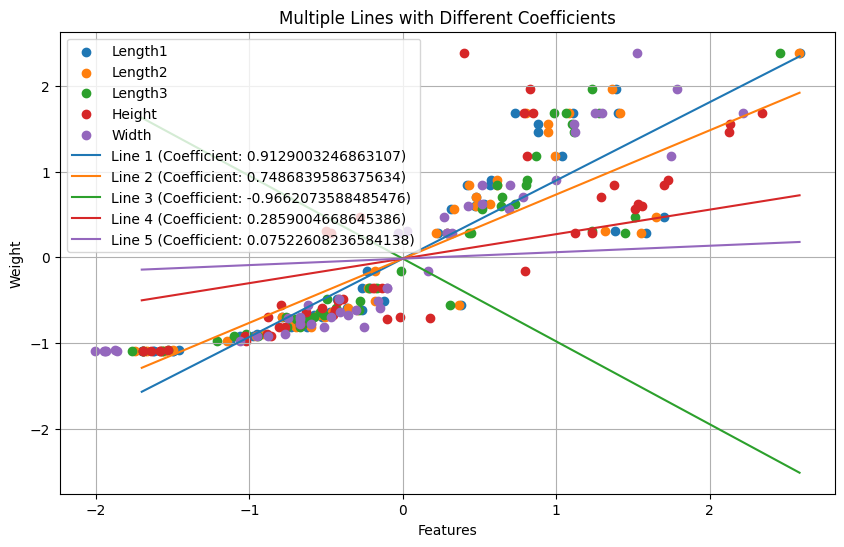

In [32]:
# Splitting the dataset into training and testing sets
X = data[['Length1', 'Length2', 'Length3', 'Height', 'Width']]
Y = np.array(data['Weight']).reshape((-1,1))
object = StandardScaler()
X_scale = object.fit_transform(X)
Y_scale = object.fit_transform(Y)
X_train, X_test, y_train, y_test = train_test_split(X_scale, Y_scale, test_size=0.3, random_state=42)

# Create a linear regression model
model = LinearRegression()
# Fit the model to the training data
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', mean_squared_error(y_test, y_pred, squared=False))

# Print the coefficients and intercept
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)


# Plotting
plt.figure(figsize=(10, 6))

# Plotting the actual data points

plt.scatter(X_test[:, 0], y_test, label='Length1')
plt.scatter(X_test[:, 1], y_test, label='Length2')
plt.scatter(X_test[:, 2], y_test, label='Length3')
plt.scatter(X_test[:, 3], y_test, label='Height')
plt.scatter(X_test[:, 4], y_test, label='Width')

# Generating X values for plotting lines
x_values = np.linspace(np.min(X_test[:, 0]), np.max(X_test[:, 0]), 100).reshape(-1, 1)

# Getting the coefficients (weights) of the features from the model
coefficients = model.coef_

# Plotting a line for each coefficient
y_values = coefficients[0,0] * x_values + model.intercept_
label = f'Line {1} (Coefficient: {coefficients[0,0]})'
plt.plot(x_values, y_values, label=label)

y_values = coefficients[0,1] * x_values + model.intercept_
label = f'Line {2} (Coefficient: {coefficients[0,1]})'
plt.plot(x_values, y_values, label=label)

y_values = coefficients[0,2] * x_values + model.intercept_
label = f'Line {3} (Coefficient: {coefficients[0,2]})'
plt.plot(x_values, y_values, label=label)

y_values = coefficients[0,3] * x_values + model.intercept_
label = f'Line {4} (Coefficient: {coefficients[0,3]})'
plt.plot(x_values, y_values, label=label)

y_values = coefficients[0,4] * x_values + model.intercept_
label = f'Line {5} (Coefficient: {coefficients[0,4]})'
plt.plot(x_values, y_values, label=label)



plt.title('Multiple Lines with Different Coefficients')
plt.xlabel('Features')
plt.ylabel('Weight')
plt.legend()
plt.grid(True)
plt.show()

[[ 0.          1.11200944  0.34309093 -0.10561783 -0.05315554]] [-0.23979498]
MSE =  0.059896087279762145
MAE =  0.16867491553390412


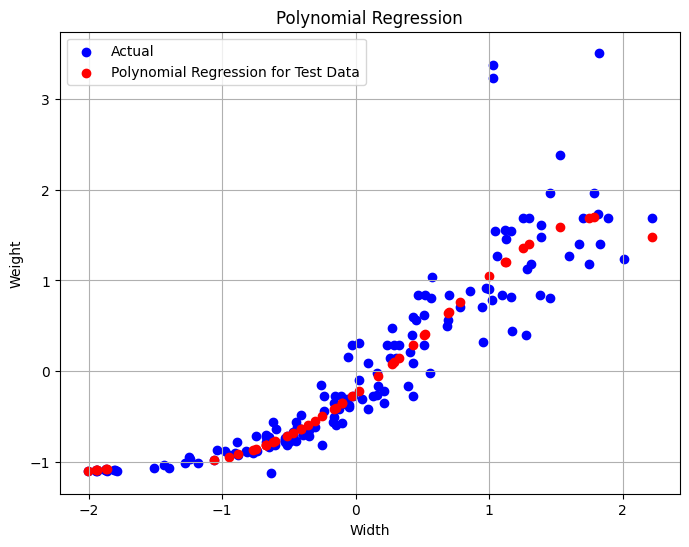

In [55]:
# Extracting the features and target variable
X = data[['Width']]  # Feature (independent variable)
y = data['Weight']     # Target variable (dependent variable)
object = StandardScaler()
X_scale = object.fit_transform(X)
Y_scale = object.fit_transform(Y)
X_train, X_test, y_train, y_test = train_test_split(X_scale, Y_scale, test_size=0.3, random_state=42)

# Define the degree of the polynomial
degree = 4

# Transforming features into polynomial features
poly_features = PolynomialFeatures(degree=degree)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.fit_transform(X_test)

# Fitting the polynomial regression model
model = LinearRegression()
model.fit(X_poly_train, y_train)
print(model.coef_,model.intercept_)
# Predicting
y_pred = model.predict(X_poly_test)


# Predicting on the test data
# Calculating Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
# Calculating Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

print('MSE = ', mse)
print('MAE = ', mae)
# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(X_scale, Y_scale, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Polynomial Regression for Test Data')
plt.title('Polynomial Regression')
plt.xlabel('Width')
plt.ylabel('Weight')
plt.legend()
plt.grid(True)
plt.show()


[[ 0.          1.26579795 -0.74404866 -0.34381478  0.20330743  0.01727891]] [0.3593248]
MSE =  0.2839784562751326
MAE =  0.3783860951340521


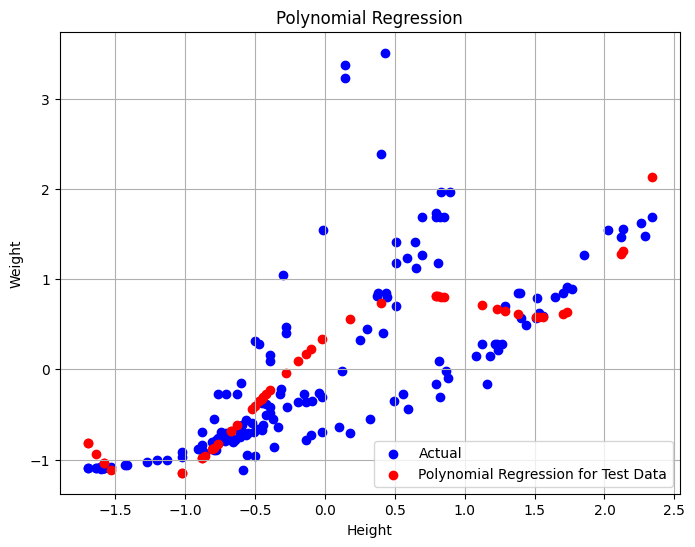

In [56]:
# Extracting the features and target variable
X = data[['Height']]  # Feature (independent variable)
y = data['Weight']     # Target variable (dependent variable)
object = StandardScaler()
X_scale = object.fit_transform(X)
Y_scale = object.fit_transform(Y)
X_train, X_test, y_train, y_test = train_test_split(X_scale, Y_scale, test_size=0.3, random_state=42)
# Define the degree of the polynomial
degree = 5

# Transforming features into polynomial features
poly_features = PolynomialFeatures(degree=degree)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.fit_transform(X_test)

# Fitting the polynomial regression model
model = LinearRegression()
model.fit(X_poly_train, y_train)

# Predicting
y_pred = model.predict(X_poly_test)


# Predicting on the test data
# Calculating Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
# Calculating Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(model.coef_,model.intercept_)
print('MSE = ', mse)
print('MAE = ', mae)
# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(X_scale, Y_scale, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Polynomial Regression for Test Data')
plt.title('Polynomial Regression')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend()
plt.grid(True)
plt.show()
